# Data 형태 파악 및 Feature별 검토

## Data 형태 파악

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [89]:
# seaborn 관련 셋팅
sns.set_style("darkgrid")
sns.set_palette("bright")

In [90]:
df = pd.read_csv("./data/실전db.csv")
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [91]:
# 서울시 기상데이터 불러오기
#weather_df = pd.read_csv("./data/서울시_기상데이터.csv", encoding="cp949")  # 한글 관련 인코딩 설정
#weather_df

In [92]:
# 연월일 Column 추가 및 datetime 형태로 날짜 정보 저장
#weather_df["연월일"] = pd.to_datetime(weather_df["일시"].str[:10])
#weather_df

In [93]:
#traffic_df = pd.read_excel("./data/2020교통량통합.xlsx", engine="openpyxl")
#traffic_df

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


> => 날짜 정보의 datatype이 object로 되어 있으므로, datetime으로 변환해주고자 함

### 날짜 정보 datatype 변환 후 데이터프레임 저장 => "df_v1"

In [95]:
df_v1 = df.copy()
df_v1["JOIN_DATE"] = pd.to_datetime(df_v1["JOIN_DATE"])
df_v1["DATE"] = pd.to_datetime(df_v1["DATE"])
df_v1.info()  # 변환 후 datatype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


## Feature별 검토

### 1) USER_ID

In [96]:
# 고유한 유저ID 개수 파악 => 165,425개 ID 확인
len(df_v1["USER_ID"].unique())

165425

In [97]:
df_v1["USER_ID"].unique()[:50]  # 앞쪽 50개 현황 확인

array([  2858,   5647,  33314,  37001,  37819,  45633,  61985,  66488,
        71927,  73825,  74429,  80936,  83850,  84907,  88589, 107953,
       118732, 125584, 137264, 137602, 138118, 139833, 151196, 156442,
       165827, 175466, 176463, 195008, 199009, 256852, 269477, 275578,
       276164, 279001, 279687, 285903, 293079, 293127, 302513, 303039,
       306181, 309788, 315468, 316603, 316715, 320272, 324808, 343607,
       346927, 348613], dtype=int64)

In [98]:
df_v1["USER_ID"].unique()[-50:]  # 뒤쪽 50개 현황 확인

array([1829906, 1829909, 1829914, 1829917, 1829934, 1829935, 1829940,
       1829950, 1829956, 1829959, 1829962, 1829980, 1829984, 1830011,
       1830017, 1830033, 1830105, 1830109, 1830116, 1830122, 1830129,
       1830151, 1830174, 1830229, 1830238, 1830258, 1830269, 1830280,
       1830291, 1830303, 1830312, 1830317, 1830364, 1830365, 1830367,
       1830380, 1830390, 1830405, 1830442, 1830449, 1830468, 1830477,
       1830491, 1830534, 1830544, 1830551, 1830570, 1830580, 1830589,
       1830598], dtype=int64)

### 2) JOIN_DATE(가입일)

#### 연도 기준 확인

In [99]:
# 가입일 연도 기준, 기간 확인
np.sort(df_v1["JOIN_DATE"].dt.year.unique())

array([1970, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

> => 2013년 ~ 2020년의 기간이 확인되는 가운데, 동떨어져 보이는 1970년 data가 존재함 확인

In [100]:
# 1970년 data 내역 확인 => 총 1093건 존재함
df_v1.query("JOIN_DATE <= '1970-12-31'")

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


In [101]:
# 1970년에 해당하는 1093건의 날짜 data 고유한 값 리스트 확인 => 모든 data가 "1970년 1월 1일"로 입력되어 있는 것을 확인
df_v1.query("JOIN_DATE <= '1970-12-31'")["JOIN_DATE"].unique()

array(['1970-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

> => 아마도, 유저의 가입일 정보가 없는 data에 대해 일괄적으로 "1970-01-01"이 입력된 것으로 추정됨

In [102]:
# 해당되는 USER_ID 개수 확인 => 총 264개 확인
len(df_v1.query("JOIN_DATE <= '1970-12-31'")["USER_ID"].unique())

264

In [103]:
# 점검을 위해 모든 USER_ID에 대해 JOIN_DATE가 각각 1개씩만 존재하는지 확인함 => 모두 1개씩만 존재함 확인 완료

total = 0
count = 0
for k, v in df_v1.groupby("USER_ID")["JOIN_DATE"]:
    total += 1
    if len(set(v.values)) != 1:
        print(k, len(set(v.values)))
        count += 1

print(f"총 {total}개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => {count}개")

총 165425개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => 0개


#### 월 기준 확인

In [104]:
# 가입일 연도별 존재하는 월 정보 확인
for year_v in np.sort(df_v1["JOIN_DATE"].dt.year.unique()):
    temp_df = df_v1[df_v1["JOIN_DATE"].dt.year == year_v]
    month_list = np.sort(temp_df["JOIN_DATE"].dt.month.unique())
    print(year_v, month_list)

1970 [1]
2013 [12]
2014 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2015 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2020 [ 1  2  3  4  5  6  7  8  9 10 11 12]


> => 1970년을 제외하면, 2013년 12월을 시작으로 2020년 12월까지 매월 data가 존재하는 것을 확인함

> => 참조로 모두의주차장 서비스 관련 정보 검색 결과, 해당 서비스 론칭시점이 2013년 12월인 것을 확인함

#### 가입연도별 분포 시각화

In [105]:
# 가입일 연도 Column 별도 생성 => "df_v1_1"
df_v1_1 = df_v1.copy()
df_v1_1["JOIN_YEAR"] = df_v1_1["JOIN_DATE"].dt.year
df_v1_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020


<AxesSubplot:xlabel='JOIN_YEAR', ylabel='count'>

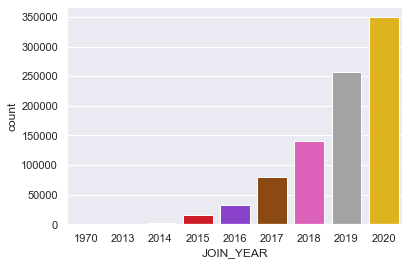

In [106]:
# 가입연도 기준 이용건수 분포 시각화
sns.countplot(data=df_v1_1, x="JOIN_YEAR")

> => 최근에 가입한 이용자일수록 2020년 연간 이용건수도 많음을 확인함

[264, 9, 549, 2679, 5796, 13500, 22936, 42124, 77568] => 총 165425명


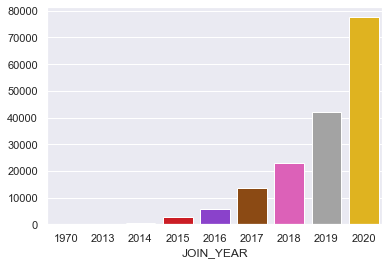

In [107]:
# 참조로, 연도별 신규 가입한 이용자수 현황도 추가 확인
join_count = df_v1_1.groupby("JOIN_YEAR")["USER_ID"].unique()
x = join_count.index
y = []

for v in join_count:
    y.append(len(v))

sns.barplot(x=x, y=y)
print(y, f"=> 총 {np.sum(y)}명")

> => 연도별로 신규 가입한 이용자수 또한 지속적으로 상승하는 추세인 것을 확인함(2020년 신규 가입자수 : 77,568명)

### 3) D_TYPE

In [108]:
# 고유한 값 확인 => 3가지 타입 존재함 확인
df_v1_1["D_TYPE"].unique()

array(['AA', 'BB', 'CC'], dtype=object)

<AxesSubplot:xlabel='D_TYPE', ylabel='count'>

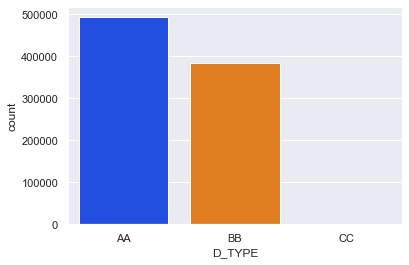

In [109]:
sns.countplot(data=df_v1_1, x="D_TYPE")

In [110]:
df_v1_1["D_TYPE"].value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

> => "AA"와 "BB" 건이 대부분이며, "CC" 건은 전체 대비 매우 적은 규모인 것을 확인함

In [111]:
# "USER_ID"별로 "D_TYPE"의 개수 체크해보기 => 두 Feature간 1대1로 매핑되어 있음을 확인
count_dtype = 0
for v in df_v1_1.groupby("USER_ID"):
    id_v, info_v = v
    v1 = info_v["D_TYPE"]
    if len(v1.unique()) != 1:
        print(f"{id_v} => {v1.unique()}")
        count_dtype += 1

print(f"'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 {count_dtype}개 확인 완료!")

'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 0개 확인 완료!


> => "AA", "BB", "CC"가 어떤 의미인지는 명확하지 않으나, 특정 기준으로 USER들을 분류해놓은 USER그룹이라는 점 판단 가능

### 4) STORE_ID

In [112]:
# 고유한 STORE_ID 개수 확인 => 총 1061개 존재함 확인
len(df_v1_1["STORE_ID"].unique())

1061

### 5) GOODS_TYPE

In [113]:
# GOODS_TYPE 내역 확인 => A, B, C, D 총 4개의 타입이 존재함 확인
np.sort(df_v1_1["GOODS_TYPE"].unique())

array(['A', 'B', 'C', 'D'], dtype=object)

<AxesSubplot:xlabel='GOODS_TYPE', ylabel='count'>

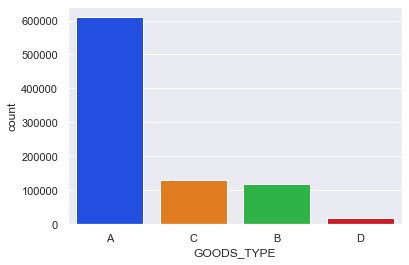

In [114]:
sns.countplot(data=df_v1_1, x="GOODS_TYPE")

In [115]:
df_v1_1["GOODS_TYPE"].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

> => A가 가장 큰 비중을 차지하며, C와 B는 상대적으로 비슷한 수준이고 D가 가장 적은 비중을 차지함 확인

### 6) DATE(결제일)

In [116]:
# 날짜 최소값 확인
df_v1_1["DATE"].min()

Timestamp('2020-01-01 00:00:00')

In [117]:
# 날짜 최대값 확인
df_v1_1["DATE"].max()

Timestamp('2020-12-31 00:00:00')

> => 2020년 1월 1일 ~ 2020년 12월 31일 결제된 data 내역임을 확인함

#### 결제월별 분포 시각화

In [118]:
# 결제월 정보 Column 추가한 데이터프레임 생성 => "df_v1_2"
df_v1_2 = df_v1_1.copy()
df_v1_2["DATE_YM"] = df_v1_2["DATE"].dt.strftime("%Y%m")
#df_v1_2["DATE_YM"] = df_v1_2["DATE_YM"].astype(int)
df_v1_2  # 결제월("DATE_YM") 입력된 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001
...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012


<AxesSubplot:xlabel='DATE_YM', ylabel='count'>

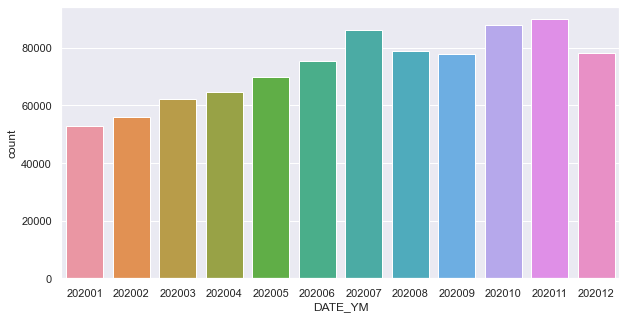

In [119]:
# 2020년 월별 결제건수 분포 추이 확인 => 대체적으로 하반기로 갈수록 증가하는 경향 확인
plt.figure(figsize=(10,5))
sns.countplot(data=df_v1_2, x="DATE_YM")

### 7) COUNT(결제건수)

In [120]:
# 결제건수 현황 확인 => 다양한 유형의 결제건수 존재함 확인
np.sort(df_v1_2["COUNT"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 55, 58, 59, 61], dtype=int64)

<AxesSubplot:xlabel='COUNT', ylabel='count'>

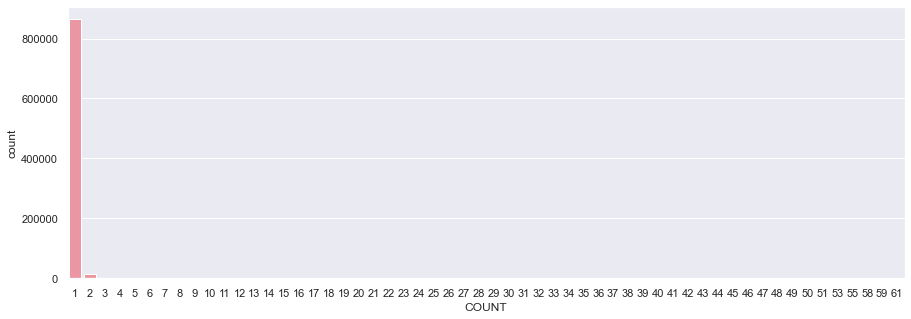

In [121]:
# 결제건수별 분포 시각화
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="COUNT")

In [122]:
df_v1_2["COUNT"].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
12        21
16        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
23        15
17        15
21        14
25        14
18        14
19        13
26         9
22         9
32         9
34         7
27         7
24         7
31         7
30         7
29         6
20         6
36         5
40         4
46         3
37         3
38         3
39         3
49         3
35         3
43         2
47         2
42         2
50         2
33         2
59         1
41         1
53         1
58         1
45         1
61         1
55         1
48         1
51         1
44         1
Name: COUNT, dtype: int64

> => 결제건수가 1건인 유형이 절대적으로 많긴 하지만, 다양한 유형의 결제건수가 함께 존재함을 확인함

### 8) AD1(점포 주소)

In [123]:
# 고유한 값 확인 => 다양한 주소값 유형이 존재함 확인
df_v1_2["AD1"].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

<AxesSubplot:xlabel='AD1', ylabel='count'>

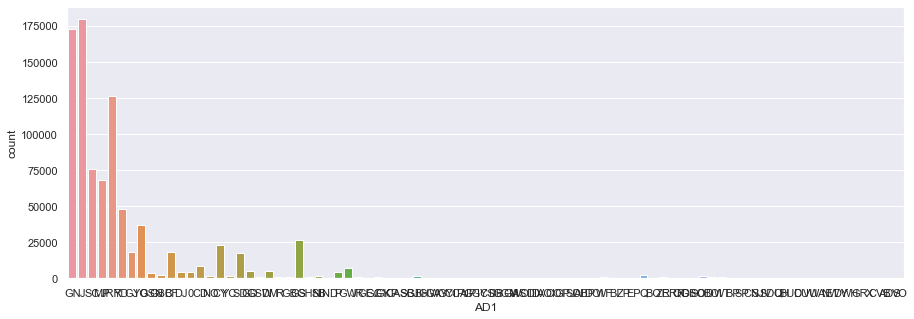

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="AD1")

> => 각각의 주소값이 나타내는 의미는 명확하지 않으나, 특정 주소값(10개 내외)에 많은 data가 몰려있는 것이 확인됨 => 특정 지역 STORE에 대한 이용량이 많은 것으로 추정

In [125]:
# 점검 차원에서 "STORE_ID"별로 "AD1"의 개수 체크 => 1대1로 매핑되어 있음을 확인
count_ad1 = 0
for v in df_v1_2.groupby("STORE_ID"):
    id_v, info_v = v
    v1 = info_v["AD1"]
    if len(v1.unique()) != 1:
        print(f"{id_v} => {v1.unique()}")
        count_ad1 += 1

print(f"'AD1'이 1개가 아닌 'STORE_ID'의 개수 => 총 {count_dtype}개 확인 완료!")

'AD1'이 1개가 아닌 'STORE_ID'의 개수 => 총 0개 확인 완료!


> => 예외사항 없이, 각 "STORE_ID"별로 1개씩의 주소값을 갖고 있음 확인함

# 예측 모델에 활용할 주요 Feature 선별을 위한 분석작업

## 요일 및 날짜에 따른 이용량 변화 분석

### 전체 data 기준, 요일별 이용량 추이 분석

#### 요일 정보 Column 추가한 데이터프레임 생성 => "df_v2"

In [126]:
# "DATE(결제일)" 기준 요일 정보 추출 후 "DATE_WDAY" Column에 해당 정보 저장
df_v2 = df_v1_2.copy()
df_v2["DATE_WDAY"] = df_v2["DATE"].dt.strftime("%a")
df_v2  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu


<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

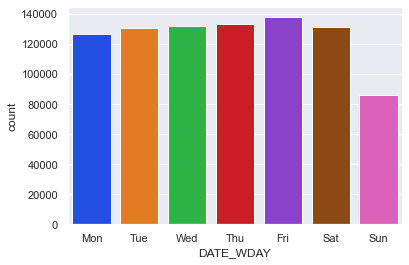

In [127]:
# 요일별 data건수 분포 시각화
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # 요일 순서 지정

> => 월요일부터 금요일까지는 점차 이용량이 증가하는 추세이며, 토요일에 소폭 감소 후 일요일에는 현저히 적은 이용량을 나타냄

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "D_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

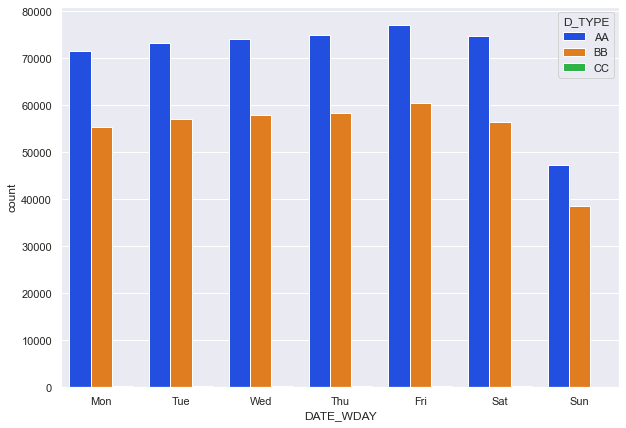

In [128]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="D_TYPE", hue_order=["AA", "BB", "CC"])

> => 대다수의 비중을 차지하고 있는 A와 B를 기준으로 비교했을 때, 두 그룹간 의미있는 차이는 관찰되지 않음

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "GOODS_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

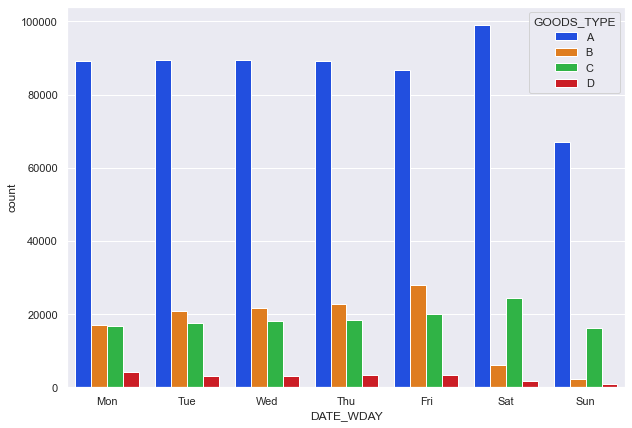

In [129]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="GOODS_TYPE", hue_order=["A", "B", "C", "D"])

> => 금요일과 토요일을 중심으로 A와 B TYPE간 서로 다른 이용행태가 나타남을 확인함

> => A TYPE의 경우, 금요일에는 이용량이 소폭 감소하고 토요일에 이용량이 상당히 증가하는 추세를 보임<br/> => 반면 B TYPE의 경우, 금요일까지 꾸준히 이용량이 상승한 후 토요일에 큰 폭으로 감소하는 추세를 보임

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => 이용월 기준 분류

#### "DATE_M" Column 추가한 데이터프레임 생성 => "df_v2_1"

In [130]:
df_v2_1 = df_v2.copy()
df_v2_1["DATE_M"] = df_v2["DATE"].dt.strftime("%m").astype(int)  # "DATE_M"(이용월) 정보 추가
df_v2_1["DATE_D"] = df_v2["DATE"].dt.strftime("%d").astype(int)  # "DATE_D"(이용일) 정보도 함께 추가
df_v2_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed,1,1
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed,1,1
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed,1,1
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed,1,1
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu,12,31
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu,12,31
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu,12,31
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu,12,31


#### 각 월별로 요일에 따른 이용량 변화 시각화

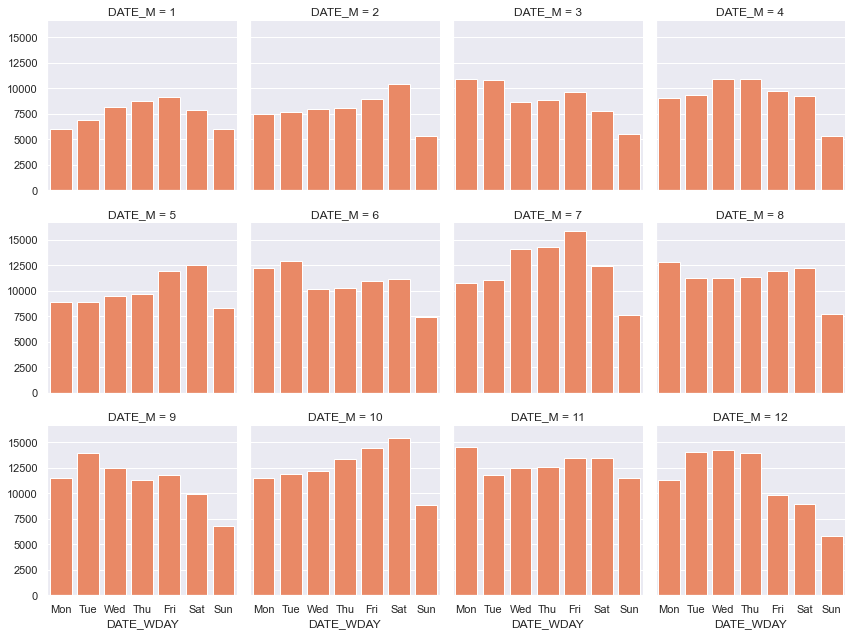

In [131]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], color="coral")  # 코랄색 적용

> => 월별로 이용행태가 서로 다르게 나타난다는 것을 확인 가능

> => 주요 특징을 전체적으로 살펴보자면,<br/> 토요일 이용량이 유독 많은 달(2월, 5월, 10월)이 있는가 하면, 주 초반(월, 화) 이용량이 많은 달(3월, 6월, 9월)도 확인됨<br/> 또한, 금요일 이용량이 유독 많은 달(1월, 7월)이 있는 반면, 평일 중 금요일 이용량이 유독 적은 달(12월)도 존재함

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => 월별/"GOODS_TYPE"별 기준 복합 적용

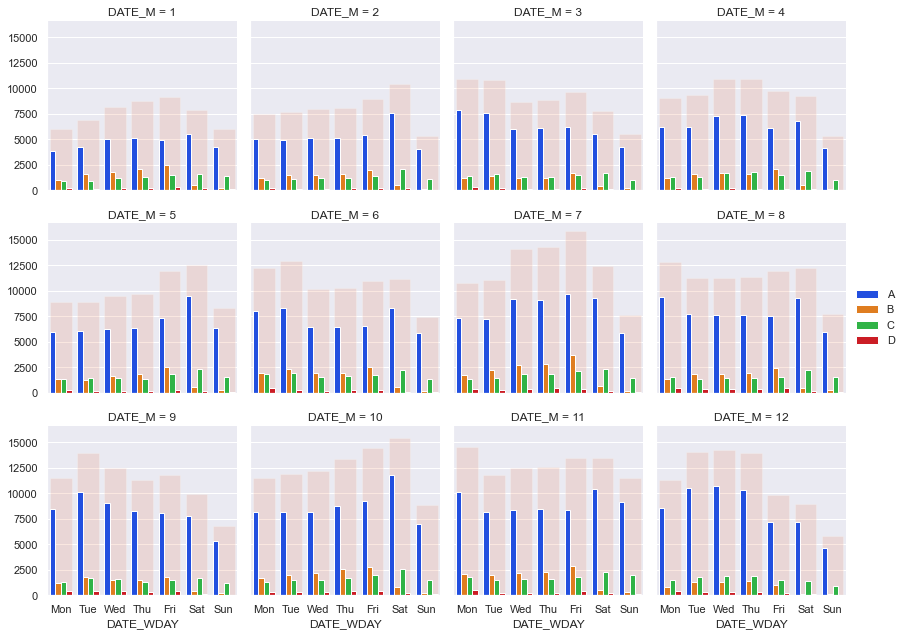

In [132]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정

# 월별 전체 추이 그래프 겹쳐 그리기 => 참조용
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      alpha=0.2, color="coral")  # 투명도 및 색상 적용

# "GOODS_TYPE"별로 구분한 그래프 그리기
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      hue=df_v2_1["GOODS_TYPE"], hue_order=["A", "B", "C", "D"], palette="bright")

g.add_legend()

> => 전체적으로 비중이 가장 큰 A가 갖는 특징이 월별 특징과 비슷하게 나타나는 가운데, 1월/7월/11월의 금요일 이용량에 대해서는 A보다 B의 영향력이 상대적으로 더 큰 경향이 나타남

### 날짜(day)별 이용량 추이 분석

<AxesSubplot:xlabel='DATE_D', ylabel='count'>

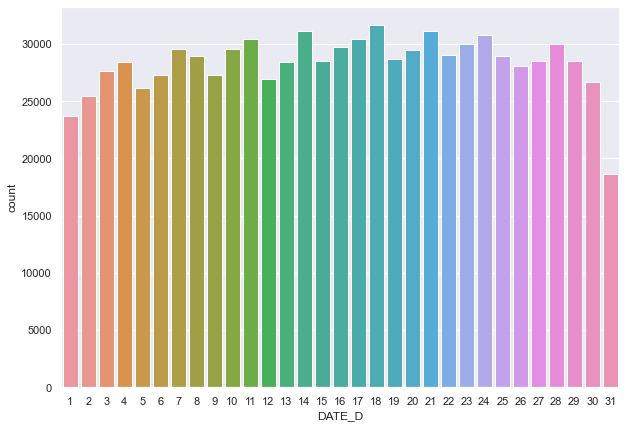

In [133]:
# 날짜(day)별 data건수 분포 시각화
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2_1, x="DATE_D")

> => 3~4일 단위의 패턴이 부분적으로 관찰되며, 대체적으로 후반부로 갈수록 이용량이 소폭 증가하는 경향을 보임

> => 31일이 유독 적은 이유는 월별로 31일이 없는 달도 있기 때문인 것으로 판단됨

## 요일 및 날짜에 따른 이용량 변화 분석 결과
* 요일에 따른 이용량 변화는 물론이고, 월별, 날짜별, "GOODS_TYPE"별로도 이용량이 서로 다른 특성을 보임을 확인함
* 다만, 현재 주어진 예측모델 적용 기준상 Traing 데이터(1\~9월 기준)와 Test 데이터(10\~12월 기준)의 기준월이 상이하므로, 예측모델 적용 시 "월" Feature는 제외시키기로 함

# 예측 모델에 활용할 주요 Feature 선별 및 유저별 이용건수 예측(1차)

* 기존 Feature별 적용여부 판단(지금까지 분석한 내용 기준)
  - "JOIN_DATE" => 유저별 1개씩 존재하는 가입일 정보로 "USER_ID" 대비 추가 변별력 없음(적용 보류)
  - "D_TYPE" => 유저별 1개씩 존재하는 값으로 "USER_ID" 대비 추가 변별력 없음(적용 보류)
  - **"STORE_ID"** => 유저가 이용한 점포의 고유 id로 변별력 있음(적용)
  - **"GOODS_TYPE"** => 각 TYPE별로 이용행태가 다르게 나타나므로 변별력 있음(적용)
  - "DATE" => 날짜별로 이용행태 다르게 나타나므로 변별력 있음(적용) / 단, 연도 및 월을 제외한 이용일(**"DATE_D"**) 기준으로 적용
  - "AD1" => 점포id별로 1개씩 존재하는 주소값으로 "STORE_ID" 대비 추가 변별력 없음(적용 보류)<br/>
<br/>
* 추가 적용 Feature
  - **"DATE_WDAY"** => "DATE"에서 추출한 요일 정보로 요일별 특성 반영
  
### &nbsp;&nbsp; => "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID" 기준 예측모델 적용

<br/>

* 예측 모델 적용 관련 조건 및 가이드
  - 초기 랜덤 시드 설정 => np.random.seed(42)
  - 데이터 구성 가이드<br/>
    o Training Data => 2020.01.01 ~ 2020.09.30<br/>
    o Test Data => 2020.10.01 ~ 2020.12.31

In [134]:
np.random.seed(42)  # 랜덤 시드값 설정

In [135]:
# 위 가이드 기준 Training, Test 데이터 분류
training_v1 = df_v2_1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = df_v2_1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

In [136]:
# 요일 정보를 숫자로 변경
training_v1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)
test_v1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)

# GOODS_TYPE 정보를 숫자로 변경
training_v1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)
test_v1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)

c:\users\hj\.conda\envs\pydata\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [137]:
# Training, Test 데이터 준비
x_train = training_v1[["USER_ID",
                       "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID"]]  # USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_test = test_v1[["USER_ID",
                  "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID"]]  # USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [138]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_WDAY,DATE_D,GOODS_TYPE,STORE_ID
0,2858,3,1,1,1892
1,5647,3,1,1,182009
2,33314,3,1,1,82431
3,37001,3,1,3,725
4,37819,3,1,3,220691
...,...,...,...,...,...
623574,1709914,3,30,2,221022
623575,1709935,3,30,2,725
623576,1709942,3,30,2,223058
623577,1709950,3,30,1,182320


In [139]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_23104/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [140]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17597800931571767
MAE : 0.09133915888759021


> => 유저별 이용건수 예측(1차) 결과, MSE는 0.17443 ~ 0.17598 수준, MAE는 0.08876 ~ 0.09134 수준으로 측정됨 확인

# [비교용] 유저별 이용건수 예측(1-1차)
* 예측 모델 적용 관련 조건 및 가이드(1차와 동일)
  - 초기 랜덤 시드 설정 => np.random.seed(42)
  - 데이터 구성 기준<br/>
    o Training Data => 2020.01.01 ~ 2020.09.30<br/>
    o Test Data => 2020.10.01 ~ 2020.12.31<br/>
<br/>
* 1차에서 적용 보류한 Feature 2개 추가
  - "JOIN_YEAR" => "JOIN_DATE"에서 추출한 유저의 가입연도 정보
  - "D_TYPE" => 유저별로 1개씩 존재하는 특정값(AA, BB, CC)

In [141]:
np.random.seed(42)  # 랜덤 시드값 설정

In [142]:
# 위 가이드 기준 Training, Test 데이터 분류
training_v1_1 = df_v2_1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1_1 = df_v2_1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

In [143]:
# 요일 정보를 숫자로 변경
training_v1_1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)
test_v1_1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)

# GOODS_TYPE 정보를 숫자로 변경
training_v1_1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)
test_v1_1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)

# D_TYPE 정보를 숫자로 변경
training_v1_1["D_TYPE"].replace({"AA":1, "BB":2, "CC":3}, inplace=True)
test_v1_1["D_TYPE"].replace({"AA":1, "BB":2, "CC":3}, inplace=True)

c:\users\hj\.conda\envs\pydata\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [144]:
# Training, Test 데이터 준비
x_train = training_v1_1[["USER_ID", "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID",
                      "JOIN_YEAR", "D_TYPE"]]  # 1차에서 적용한 Feature 외에 가입연도, D_TYPE 추가 적용
x_test = test_v1_1[["USER_ID", "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID",
                      "JOIN_YEAR", "D_TYPE"]]  # 1차에서 적용한 Feature 외에 가입연도, D_TYPE 추가 적용
y_train = training_v1_1[["COUNT"]]
y_test = test_v1_1[["COUNT"]]

In [145]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_WDAY,DATE_D,GOODS_TYPE,STORE_ID,JOIN_YEAR,D_TYPE
0,2858,3,1,1,1892,2014,1
1,5647,3,1,1,182009,2014,2
2,33314,3,1,1,82431,2014,2
3,37001,3,1,3,725,2014,2
4,37819,3,1,3,220691,2014,1
...,...,...,...,...,...,...,...
623574,1709914,3,30,2,221022,2020,2
623575,1709935,3,30,2,725,2020,1
623576,1709942,3,30,2,223058,2020,1
623577,1709950,3,30,1,182320,2020,2


In [146]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_23104/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [147]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17686155736562714
MAE : 0.09292702490955762


> => [비교용] 유저별 이용건수 예측(1-1차) 결과, MSE는 0.17592 ~ 0.17686 수준, MAE는 0.09293 ~ 0.09295 수준으로 측정됨 확인

> => MSE 및 MAE 수치 기준으로 봤을 때, 1차 결과 대비 오히려 성능이 다소 저하된 것으로 나타남

# 외부데이터 활용 검토
* 외부데이터 1) 교통량 데이터

* 외부데이터 2) 기상 데이터

In [148]:
traffic_df = pd.read_excel("./data/2020교통량통합.xlsx", engine="openpyxl")
traffic_df.head()

,DATE,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020-01-01,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,290.0,...,1472.0,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0
1,2020-01-02,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,266.0,...,1792.0,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0
2,2020-01-03,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,279.0,...,2004.0,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0
3,2020-01-04,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,330.0,...,1837.0,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0
4,2020-01-05,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,209.0,...,1634.0,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0
